In [1]:
#import liberies

In [4]:
import pandas as pd

import seaborn as sns

In [3]:
#read file

In [5]:
df = pd.read_csv("exchange_rates.csv")
df.head()


,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98030 entries, 0 to 98029
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        98030 non-null  int64  
 1   Country/Currency  98030 non-null  object 
 2   currency          98030 non-null  object 
 3   value             98030 non-null  float64
 4   date              98030 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ MB


In [8]:
df.describe()

,Unnamed: 0,value
count,98030.000000,98030.000000
mean,49014.500000,1663.988668
std,28298.967782,5503.947297
min,0.000000,0.130975
25%,24507.250000,3.966046
50%,49014.500000,35.357070
75%,73521.750000,395.377899
max,98029.000000,51690.453353


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [11]:
print(df.dtypes)
print(df.isnull().sum())

Unnamed: 0                   int64
Country/Currency            object
currency                    object
value                      float64
date                datetime64[ns]
dtype: object
Unnamed: 0          0
Country/Currency    0
currency            0
value               0
date                0
dtype: int64


In [14]:
# Check for duplicate rows and drop them if necessary
df.drop_duplicates(subset=['date', 'currency'], inplace=True)

In [16]:
df = df.drop_duplicates(subset=['date', 'currency'], keep='first')


In [17]:
pivoted_data = df.pivot_table(index='date', columns='currency', values='value', aggfunc='mean')


In [15]:
#time series

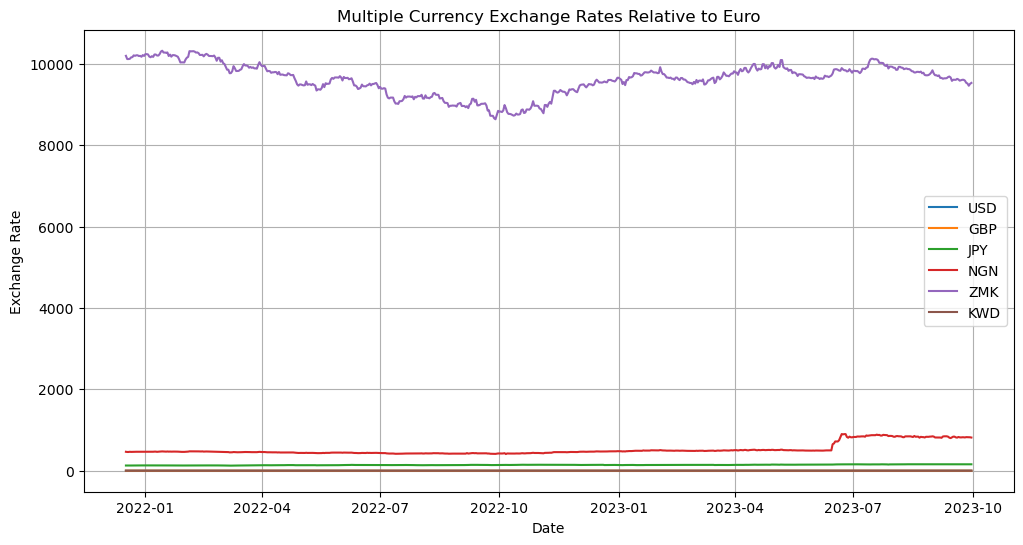

In [19]:
import matplotlib.pyplot as plt

# List of currencies to analyze (excluding EUR)
currencies_to_analyze = ['USD', 'GBP', 'JPY', 'NGN', 'ZMK','KWD']

# Plot the exchange rates for multiple currencies over time (excluding EUR)
plt.figure(figsize=(12, 6))
for currency_code in currencies_to_analyze:
    if currency_code != 'EUR':  # Exclude EUR
        currency_series = pivoted_data[currency_code]
        plt.plot(currency_series.index, currency_series.values, label=currency_code)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Multiple Currency Exchange Rates Relative to Euro')
plt.legend()
plt.grid(True)
plt.show()
